# Introduction to Machine Learning

In [ ]:
!pip install numpy matplotlib scikit-learn

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the data:

In [9]:
n_samples = 100

X, y = datasets.make_moons(n_samples=n_samples, noise=0.1)

Normalize the data and split in test and training set:

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Fit the model and predict the unobserved values:

In [11]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

Measure the performance of the model:

In [12]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.82      0.88      0.85        16

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30

Confusion Matrix:
[[11  3]
 [ 2 14]]


Try different Kernels:

In [24]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

svms = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1)
    svm.fit(X_train, y_train)
    svms[kernel] = svm
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

print("Accuracy for Different Kernels:")
for kernel, accuracy in results.items():
    print(f"{kernel}: {accuracy:.2f}")

Accuracy for Different Kernels:
linear: 0.83
poly: 0.90
rbf: 0.93
sigmoid: 0.63


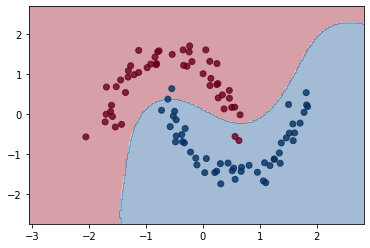

In [27]:
# visualize xy grid with decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.RdBu
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=cmap)
    plt.show()

plot_decision_boundary(svms['rbf'], X_scaled, y)

## Exercise: Kernel Comparison with Support Vector Machines

In this exercise, you will compare the performance of two different kernel functions in a Support Vector Machine (SVM) classifier. Your task is to fit both kernels to a dataset, evaluate the models, and determine which kernel performs better.

### Dataset 

- Iris dataset: A popular dataset for classification tasks that contains 150 samples of iris flowers, with four features (sepal length, sepal width, petal length, petal width) and three classes (setosa, versicolor, virginica). You can load this dataset from `sklearn.datasets` using `load_iris()`.

### Instructions:

1. Import the necessary modules and functions.
2. Load the dataset and explore its features and target classes.
3. Preprocess the data (e.g., scale the features using `StandardScaler`).
4. Split the data into training and test sets using train_test_split.
5. Train two SVM classifiers with different kernel functions (e.g., 'linear' and 'rbf') using SVC.
6. Evaluate the performance of each classifier on the test set using metrics like accuracy, precision, recall, and F1-score (use `accuracy_score`, `classification_report`, and other relevant functions from `sklearn.metrics`).
7. Compare the performance of both classifiers and determine which kernel function performs better.

In [ ]:
## Write your solution here